In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_footsteps_accelerations_absolute
%store -r Y_footsteps_accelerations_absolute
%store -r X_footsteps_continuous_absolute
%store -r Y_footsteps_continuous_absolute
#X_motion = np.concatenate((X_footsteps_accelerations_absolute, X_footsteps_continuous_absolute))
#Y_motion = np.concatenate((Y_footsteps_accelerations_absolute, Y_footsteps_continuous_absolute))

X_motion = X_footsteps_accelerations_absolute
Y_motion = Y_footsteps_accelerations_absolute
print(X_motion.shape)
print(Y_motion.shape)

(1932, 20)
(1932, 4)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where RL swings
idxs = np.where(X_motion[:, -1] == 1)[0]
X_motion_RL_swinging = X_motion[idxs]
Y_motion_RL_swinging = Y_motion[idxs]

## Predict RL foot -> x

In [8]:
X_motion_RL_swinging[0, :]

array([ 0.1       ,  0.        ,  0.        ,  0.23712376,  0.12949252,
       -0.3964732 ,  0.2356365 , -0.1298542 , -0.39937824, -0.26021677,
        0.13144492, -0.4016501 , -0.26459843, -0.1259295 , -0.39639989,
        0.1       ,  0.        ,  0.        ,  0.        ,  1.        ])

In [9]:
X_motion_RL_swinging[0, :]

array([ 0.1       ,  0.        ,  0.        ,  0.23712376,  0.12949252,
       -0.3964732 ,  0.2356365 , -0.1298542 , -0.39937824, -0.26021677,
        0.13144492, -0.4016501 , -0.26459843, -0.1259295 , -0.39639989,
        0.1       ,  0.        ,  0.        ,  0.        ,  1.        ])

### Linear Regression

In [10]:
# Input
X = np.hstack((X_motion_RL_swinging[:, :3], # Previous motion command
               X_motion_RL_swinging[:, -5:-2], # Current motion command
               X_motion_RL_swinging[:, 3:5], # FL (x,y) position
               X_motion_RL_swinging[:, 6:8], # FR (x,y) position
               X_motion_RL_swinging[:, 9:11], # RL (x,y) position
               X_motion_RL_swinging[:, 12:14])) # RR (x, y) position

# Target
Y = np.array([Y_motion_RL_swinging[:, 2]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_rl_relative_swinging_x = LinearRegression()

# Fit the model
model_rl_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.997032380282008
RMSE:  0.00678633253010659
The lowest error is:  1.7642053231403665e-05
The highest error is:  0.02024826741893404
The avg. error is:  0.005457659484329514


In [11]:
model_rl_relative_swinging_x.coef_

array([[ 2.06035416e-01, -5.55111512e-17, -1.11022302e-16,
         8.86744746e-02, -2.22044605e-16, -2.22044605e-16,
         5.69183801e-01, -4.27866060e-01,  2.87200561e-01,
         2.95710415e-01, -1.36025528e+00,  4.56892225e-01,
         2.62223078e-01, -1.98319082e-01]])

In [12]:
model_rl_relative_swinging_x.intercept_

array([-0.4818469])

Text(0, 0.5, 'Predictions')

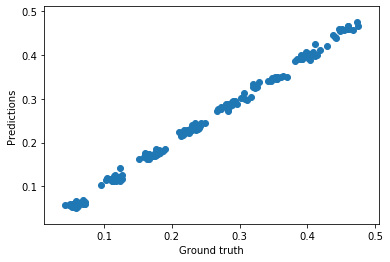

In [13]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [14]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

### Predict RL foot -> y

In [15]:
# Input
X = np.hstack((X_motion_RL_swinging[:, :3], # Previous motion command
               X_motion_RL_swinging[:, -5:-2], # Current motion command
               X_motion_RL_swinging[:, 3:5], # FL (x,y) position
               X_motion_RL_swinging[:, 6:8], # FR (x,y) position
               X_motion_RL_swinging[:, 9:11], # RL (x,y) position
               X_motion_RL_swinging[:, 12:14])) # RR (x, y) position

# Target
Y = np.array([Y_motion_RL_swinging[:, 3]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_rl_relative_swinging_y = LinearRegression()

# Fit the model
model_rl_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  -0.40527075340702257
RMSE:  0.006742579321543901
The lowest error is:  9.667101599220018e-06
The highest error is:  0.027722616903275044
The avg. error is:  0.004916264048249239


In [16]:
model_rl_relative_swinging_y.coef_

array([[ 2.89293859e-02,  0.00000000e+00,  5.55111512e-17,
        -3.77057926e-02,  0.00000000e+00,  1.11022302e-16,
        -3.14136573e-01,  5.33129593e-01, -1.38895066e-01,
        -5.97387596e-01,  1.77289318e-01, -9.82415530e-01,
         3.21649951e-01,  4.47731778e-01]])

In [17]:
model_rl_relative_swinging_y.intercept_

array([0.28026587])

Text(0, 0.5, 'Predictions')

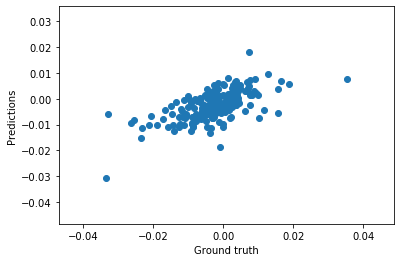

In [18]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [19]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')